In [1]:
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = './data/dogs-vs-cats/train'
TEST_DIR = './data/dogs-vs-cats/test1'
IMG_SIZE = 50
LR = 1e-3

In [3]:
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '6conv-basic')

In [4]:
'''Labelling the dataset'''
def label_img(img):
    word_label = img.split('.')[-3]
    # DIY One hot encoder
    if word_label == 'cat': return [1, 0]
    elif word_label == 'dog': return [0, 1]

In [5]:
'''Creating the training data'''
def create_train_data():
    # Creating an empty list where we should store the training data
    # after a little preprocessing of the data
    training_data = []
 
    # tqdm is only used for interactive loading
    # loading the training data
    for img in tqdm(os.listdir(TRAIN_DIR)):
 
        # labeling the images
        label = label_img(img)
 
        path = os.path.join(TRAIN_DIR, img)
 
        # loading the image from the path and then converting them into
        # grayscale for easier covnet prob
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
 
        # resizing the image for processing them in the covnet
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
 
        # final step-forming the training data list with numpy array of the images
        training_data.append([np.array(img), np.array(label)])
 
    # shuffling of the training data to preserve the random state of our data
    shuffle(training_data)
 
    # saving our trained data for further uses if required
    np.save('./data/dogs-vs-cats/train_data.npy', training_data)
    return training_data

In [6]:
'''Processing the given test data'''
# Almost same as processing the training data but
# we dont have to label it.
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
         
    shuffle(testing_data)
    np.save('./data/dogs-vs-cats/test_data.npy', testing_data)
    return testing_data

In [7]:
'''Running the training and the testing in the dataset for our model'''
train_data = create_train_data()
test_data = process_test_data()

100%|██████████| 25000/25000 [00:18<00:00, 1319.06it/s]
/home/pablo/KSCHOOL/14_PFM/mushrooms-PFM/pfmenv/lib/python3.8/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
100%|██████████| 12500/12500 [00:09<00:00, 1275.34it/s]


In [11]:
train_data = np.load('./data/dogs-vs-cats/train_data.npy', allow_pickle=True)
test_data = np.load('./data/dogs-vs-cats/test_data.npy', allow_pickle=True)

In [12]:
'''Creating the neural network using tensorflow'''
# Importing the required libraries
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
 
import tensorflow as tf
tf.compat.v1.reset_default_graph()

2022-04-02 16:18:35.023789: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pablo/KSCHOOL/14_PFM/mushrooms-PFM/pfmenv/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-02 16:18:35.023806: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input')
 
convnet = conv_2d(convnet, 32, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = conv_2d(convnet, 64, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = conv_2d(convnet, 128, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = conv_2d(convnet, 64, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = conv_2d(convnet, 32, 5, activation ='relu')
convnet = max_pool_2d(convnet, 5)
 
convnet = fully_connected(convnet, 1024, activation ='relu')
convnet = dropout(convnet, 0.8)
 
convnet = fully_connected(convnet, 2, activation ='softmax')
convnet = regression(convnet, optimizer ='adam', learning_rate = LR,
      loss ='categorical_crossentropy', name ='targets')
 
model = tflearn.DNN(convnet, tensorboard_dir ='log')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2022-04-02 16:18:36.728712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pablo/KSCHOOL/14_PFM/mushrooms-PFM/pfmenv/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-02 16:18:36.728750: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-02 16:18:36.728771: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pchome): /proc/driver/nvidia/version does not exist
2022-04-02 16:18:36.729073: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flag

In [14]:
# Splitting the testing data and training data
train = train_data[:-500]
test = train_data[-500:]

In [15]:
'''Setting up the features and labels'''
# X-Features & Y-Labels
 
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = [i[1] for i in test]

In [17]:
'''Fitting the data into our model'''
# epoch = 5 taken
model.fit({'input': X}, {'targets': Y}, n_epoch = 5,
    validation_set =({'input': test_x}, {'targets': test_y}),
    snapshot_step = 500, show_metric = True, run_id = MODEL_NAME)
# model.save(MODEL_NAME)

Training Step: 1971  | total loss: 0.44074 | time: 20.541s
| Adam | epoch: 006 | loss: 0.44074 - acc: 0.7959 -- iter: 24448/24500
Training Step: 1972  | total loss: 0.44259 | time: 21.595s
| Adam | epoch: 006 | loss: 0.44259 - acc: 0.7945 | val_loss: 0.47788 - val_acc: 0.7640 -- iter: 24500/24500
--


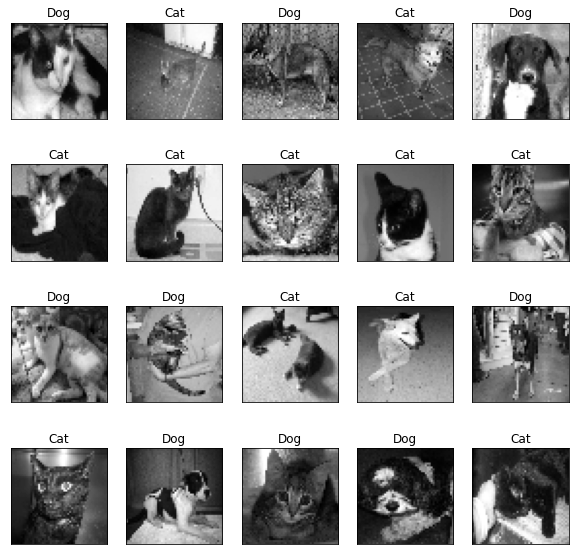

In [18]:
fig = plt.figure(figsize=(10,10))
 
for num, data in enumerate(test_data[:20]):
    # cat: [1, 0]
    # dog: [0, 1]
     
    img_num = data[1]
    img_data = data[0]
     
    y = fig.add_subplot(4, 5, num + 1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
 
    # model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
     
    if np.argmax(model_out) == 1: str_label ='Dog'
    else: str_label ='Cat'
         
    y.imshow(orig, cmap ='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()